In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

plt.rcParams['font.size'] = 14

# Scalar Quantiles via Optimal Transport

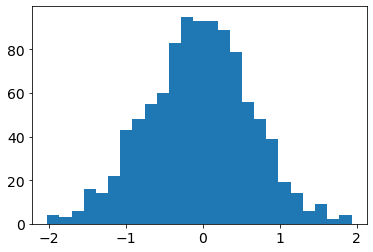

In [2]:
from experiments.data.mvn import IndependentDataProvider

d = 1
k = 1
T = 50
N = 1000

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)

plt.hist(Y, 25);

In [3]:
from vqr import VectorQuantileEstimator

vq1 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq1.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

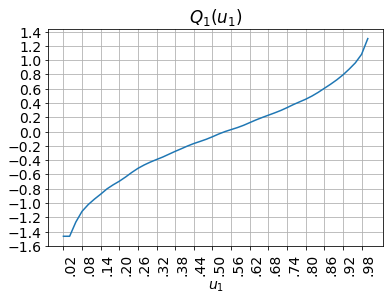

In [4]:
fig = vq1.plot_quantiles()
fig.savefig("figs/qr_1d.png", dpi=150, bbox_inches="tight")

# 2D Vector Quantiles

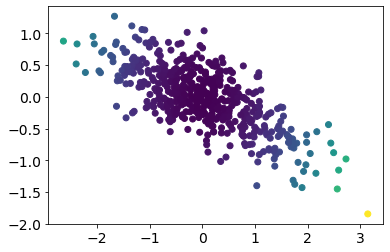

In [5]:
from experiments.data.mvn import IndependentDataProvider

d = 2
k = 1
T = 25
N = 500

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)
plt.scatter(Y[:, 0], Y[:, 1], c=np.sum(Y**2, axis=1))

In [6]:
vq2 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq2.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(n_levels=25, solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

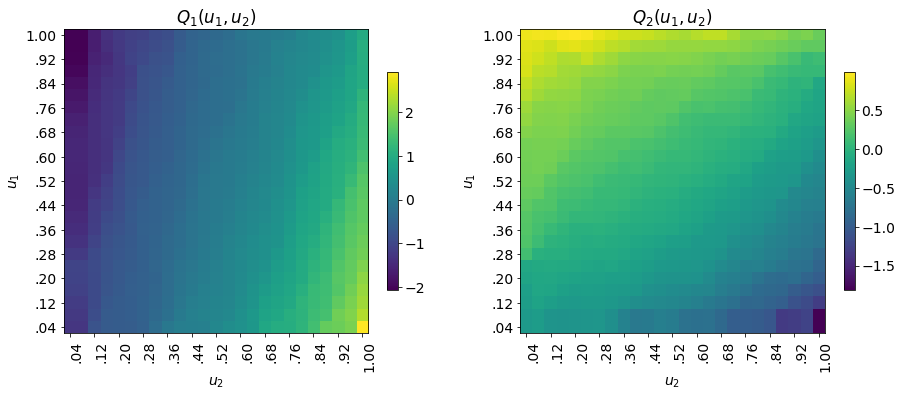

In [7]:
fig = vq2.plot_quantiles(figsize=(15, 20))

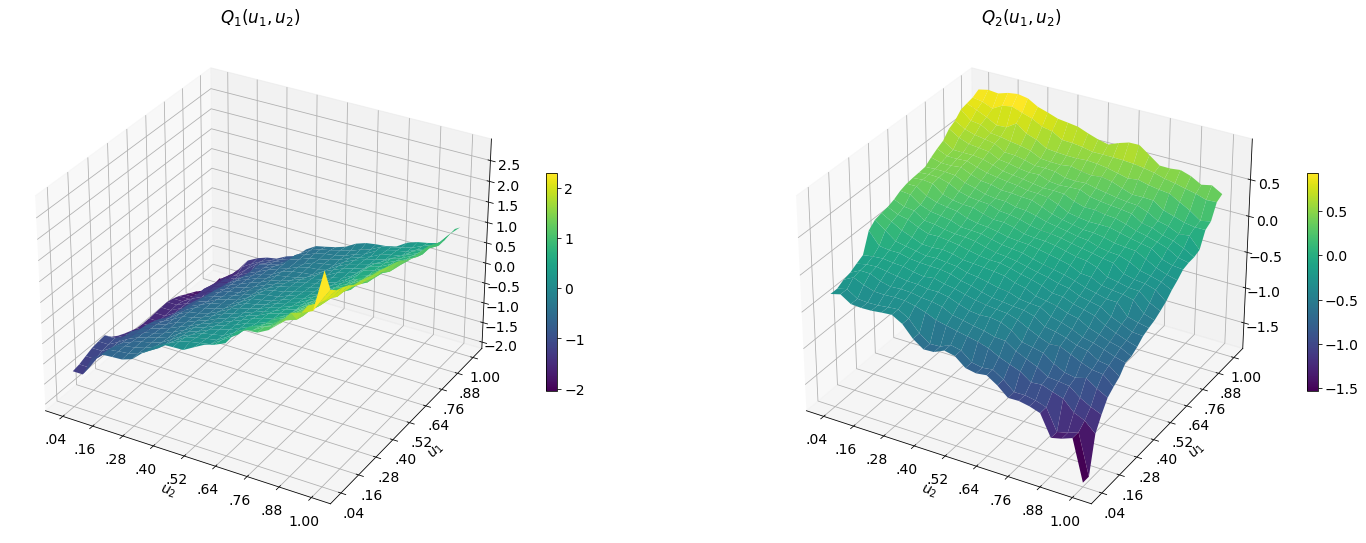

In [8]:
fig = vq2.plot_quantiles(figsize=(25, 20), surf_2d=True)
fig.savefig("figs/qr_2d.png", dpi=150, bbox_inches="tight")

# 3D Vector Quantiles

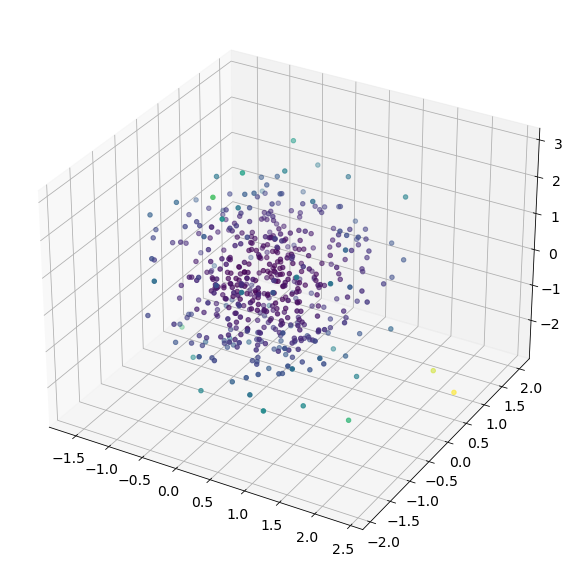

In [9]:
from experiments.data.mvn import IndependentDataProvider

d = 3
k = 1
T = 10
N = 500

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))

In [10]:
vq3 = VectorQuantileEstimator(n_levels=T, solver_opts={'verbose': True})
vq3.fit(Y)

  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

VectorQuantileEstimator(n_levels=10, solver=RegularizedDualVQRSolver(eps=1e-03),
                        solver_opts={'verbose': True})

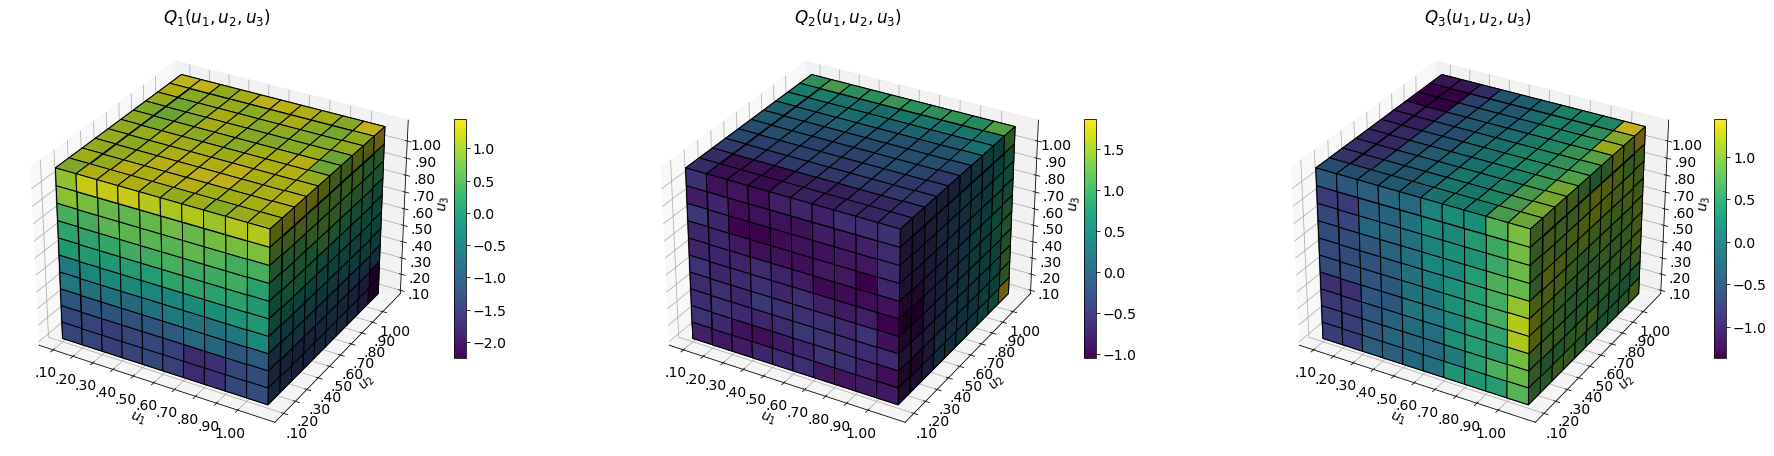

In [11]:
fig = vq3.plot_quantiles(figsize=(32, 22))
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")
